In [6]:
from utils import *
%load_ext autoreload
%autoreload 2

In [11]:
data = prepare_mnist_data()
data.keys()

dict_keys(['trainX', 'trainY', 'testX', 'testY'])

In [2]:
import numpy as np

X = np.random.rand(10, 10)
X.shape

(10, 10)

In [63]:
from scipy.optimize import linprog, milp, LinearConstraint

def solve_l1_Ax_b(A, b, constrained=True):
    # Solve min ||Ax-b||_1
    # s.t. x>=0, 1^Tx=1, x integer
    m, n = A.shape
    c = np.concatenate((np.zeros(n), np.ones(m)))
    A_ub = np.block([
        [-np.identity(n), np.zeros((n, m))], 
        [A, -np.identity(m)],
        [-A, -np.identity(m)]
    ])
    A_eq = np.block(
        [np.ones((1, n)), np.zeros((1, m))]
    )
    b_ub = np.concatenate((np.zeros(n), b, -b))
    b_eq = 1
    constraints = [
        LinearConstraint(A_ub, ub=b_ub),
    ]
    if constrained:
        constraints.append(LinearConstraint(A_eq, 1, 1))
        integrality = np.concatenate((np.ones(n), np.zeros(m)))
        sol = milp(c=c, integrality=integrality, constraints=constraints)
    else:
        sol = milp(c=c, constraints=constraints)
    return sol["x"][: n]

In [53]:
A = prepare_mnist_data()["trainX"].T

In [64]:
sol = solve_l1_Ax_b(A[:, :4], A[:, 5])
np.argmax(sol)

1

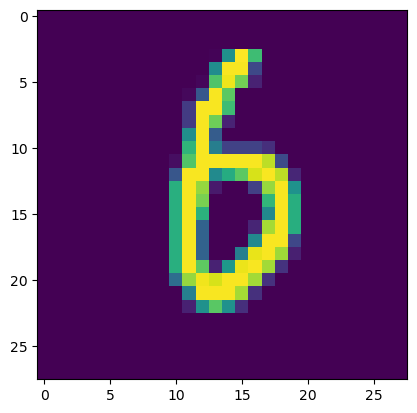

In [65]:
from matplotlib import pyplot as plt
plt.imshow(A[:, np.argmax(sol)].reshape(28, 28), interpolation='nearest')
plt.show()

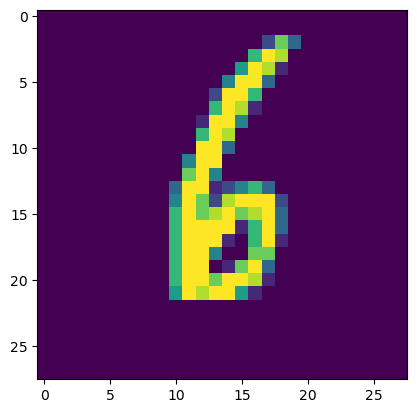

In [66]:
plt.imshow(A[:, 5].reshape(28, 28), interpolation='nearest')
plt.show()

In [71]:
# A - WH
W = A[:, np.random.randint(0, 100, 3)]
H = np.zeros((3, A.shape[1]))
for i in range(A.shape[1]):
    H[:, i] = solve_l1_Ax_b(W, A[:, i])

In [73]:
for i in range(A.shape[0]):
    W[i, :] = solve_l1_Ax_b(H.T, A[i, :], constrained=False)

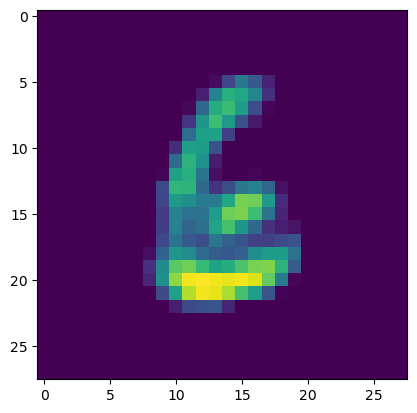

In [76]:
plt.imshow(W[:, 1].reshape(28, 28), interpolation='nearest')
plt.show()

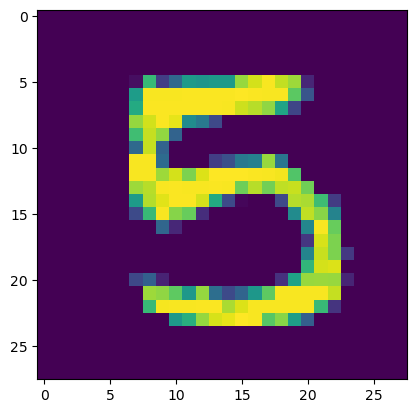

In [77]:
plt.imshow(W[:, 2].reshape(28, 28), interpolation='nearest')
plt.show()

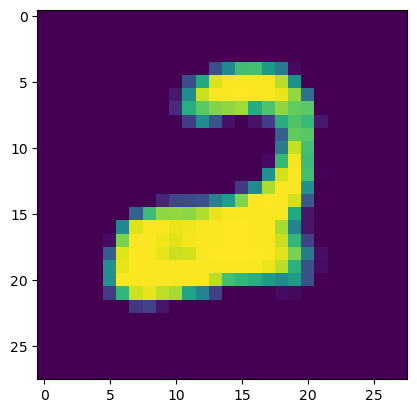

In [78]:
plt.imshow(W[:, 0].reshape(28, 28), interpolation='nearest')
plt.show()

In [12]:
from MySolution import MyClustering
c = MyClustering(K=3)
c.train(data["trainX"])

100%|█████████████████████████████████████████████████████████████████| 5/5 [01:50<00:00, 22.06s/it]


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1,
       0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0,

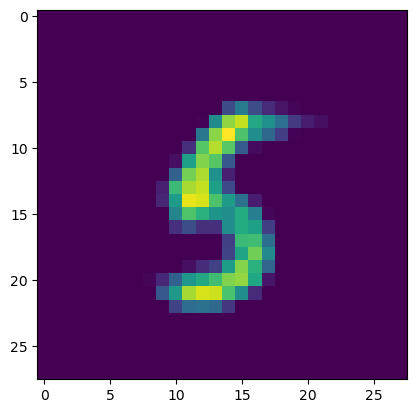

In [13]:
plt.imshow(c.W[:, 0].reshape(28, 28), interpolation='nearest')
plt.show()

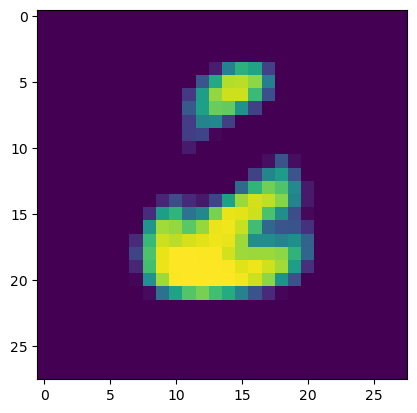

In [14]:
plt.imshow(c.W[:, 1].reshape(28, 28), interpolation='nearest')
plt.show()

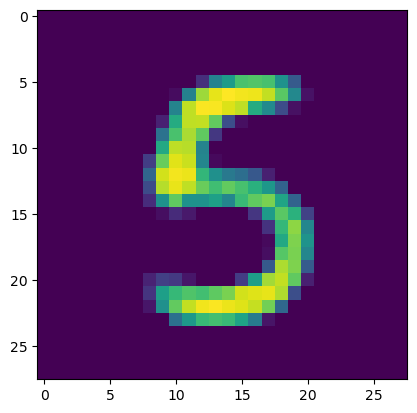

In [15]:
plt.imshow(c.W[:, 2].reshape(28, 28), interpolation='nearest')
plt.show()